In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from keras.preprocessing.image import load_img
import pickle
import cv2
from PIL import Image

In [2]:
with open('test1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

Face Capture

In [13]:
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()  
    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

    for i, (x, y, w, h) in enumerate(faces):
        face = frame[y:y + h, x:x + w]
        face_filename = f'face_{i}.jpg'
        cv2.imwrite(face_filename, face)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow('Face Capture', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [3]:
image_path = 'D:/Study/Year 3 Semester 2/Research Project/age_and_gender/Augmented Dataset/1_34_1_3_20170105001226421.jpg.chip.jpg'
def extract_features(image_path):
    features = []
    img = load_img(image_path, grayscale=True)
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img)
    features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

final_image = extract_features(image_path)
final_image.shape
final_image = final_image/255.0

1/1 [==============================] - 1s 1s/step
Predicted Gender: Female
Predicted Age Range: 27-35


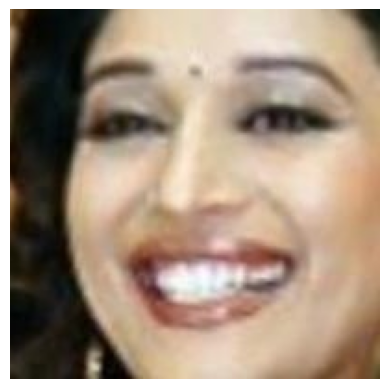

In [4]:
pred = loaded_model.predict(final_image.reshape(1, 128, 128, 1))
if round(pred[0][0][0]) < 0.5:
    gender = "Male"
else:
    gender = "Female"
predicted_age = pred[1]
predicted_age_class = predicted_age.argmax(axis=1)
if predicted_age_class == [0]:
        predicted_age_range =  '1-5'
elif predicted_age_class == [1]:
    predicted_age_range =  '6-15'
elif predicted_age_class == [2]:
    predicted_age_range =  '16-26'
elif predicted_age_class == [3]:
    predicted_age_range =  '27-35'
elif predicted_age_class == [4]:
    predicted_age_range =  '36-50'
elif predicted_age_class == [5]:
    predicted_age_range =  '51-70'
elif predicted_age_class == [6]:
    predicted_age_range =  '71-90'
else:
    predicted_age_range =  '91+'
image = load_img(image_path, grayscale=False)
plt.axis('off')
plt.imshow(image)

print("Predicted Gender:",gender)
print("Predicted Age Range:",predicted_age_range)
    